In [2]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
def load_data(image_folder, mask_folder):
    images = []
    masks = []
    for filename in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, filename))
        img = cv2.resize(img, (256, 256))  # Resize for consistency
        images.append(img)
        mask = cv2.imread(os.path.join(mask_folder, filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (64, 64))  # Resize for consistency with model output
        masks.append(mask)
    return np.array(images), np.array(masks)

In [4]:
train_images, train_masks = load_data("training_images", "training_masks")

In [5]:
test_images, test_masks = load_data("test_images", "test_masks")

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [8]:
x = base_model.output
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=x)


In [10]:
model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])

In [11]:
model.fit(train_images, train_masks, epochs=10, batch_size=8, validation_split=0.2)


Epoch 1/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1229s 6s/step - accuracy: 0.0304 - loss: -1293.3138 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 2/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1158s 6s/step - accuracy: 0.0255 - loss: -1333.9290 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 3/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1236s 6s/step - accuracy: 0.0244 - loss: -1310.6895 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 4/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1353s 7s/step - accuracy: 0.0253 - loss: -1317.5170 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 5/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1328s 7s/step - accuracy: 0.0246 - loss: -1327.1219 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 6/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1276s 6s/step - accuracy: 0.0239 - loss: -1337.4823 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 7/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 1247s 6s/step - accuracy: 0.0249 - loss: -1354.4673 - val_accuracy: 0.0262 - val_loss: -1239.2472
Epoch 8/10
199/199 ━━━━━━━━━━━━━━━

In [12]:
loss, accuracy = model.evaluate(test_images, test_masks)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.0232 - loss: -1326.5576
Test Loss: -1317.6865234375
Test Accuracy: 0.026266440749168396


In [13]:
predicted_masks = model.predict(test_images)


27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step


In [14]:
water_probability = np.mean(predicted_masks)
water_percentage = np.sum(predicted_masks) / np.sum(test_masks)

In [15]:
print("Water Probability:", water_probability)
print("Water Percentage:", water_percentage*10)

Water Probability: 1.0
Water Percentage: 0.11954138540466624


Image 1 - Water Probability: 1.0


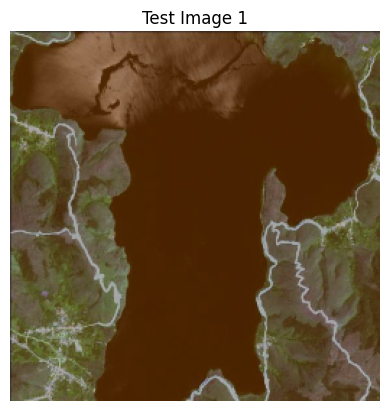

Image 2 - Water Probability: 1.0


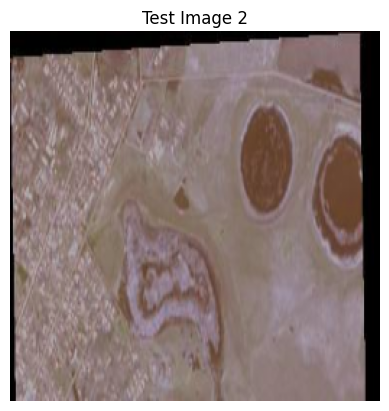

Image 3 - Water Probability: 1.0


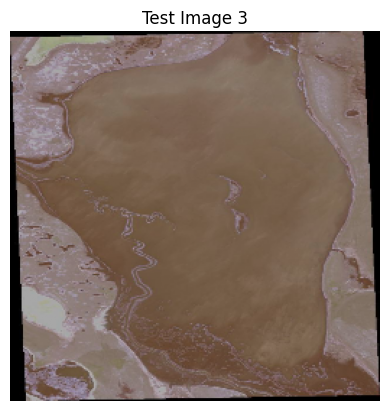

Image 4 - Water Probability: 1.0


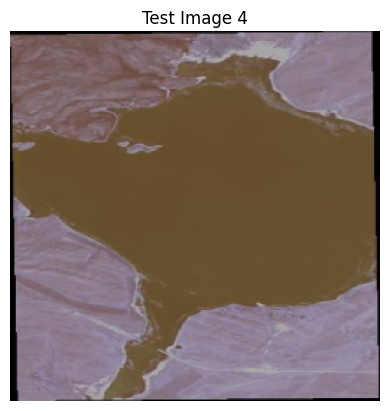

Image 5 - Water Probability: 1.0


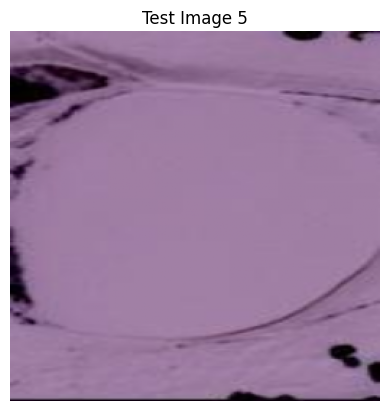

Image 6 - Water Probability: 1.0


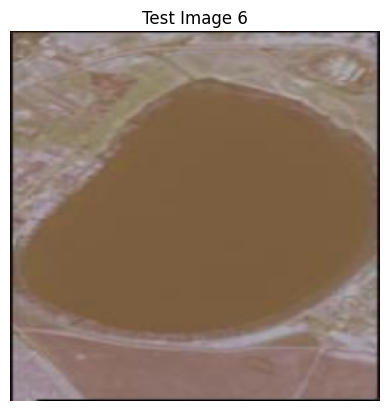

Image 7 - Water Probability: 1.0


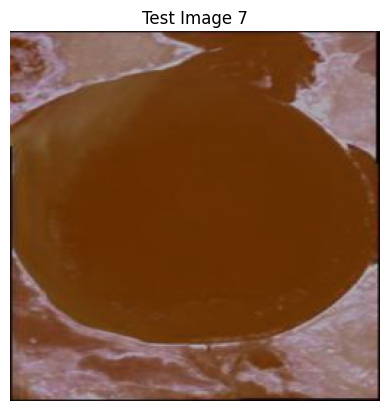

Image 8 - Water Probability: 1.0


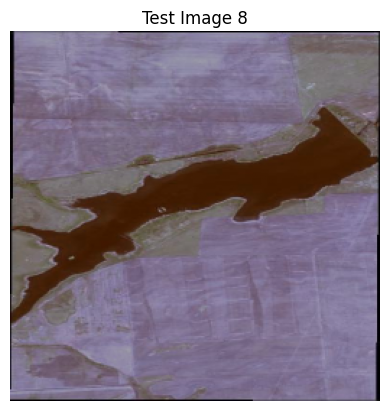

Image 9 - Water Probability: 1.0


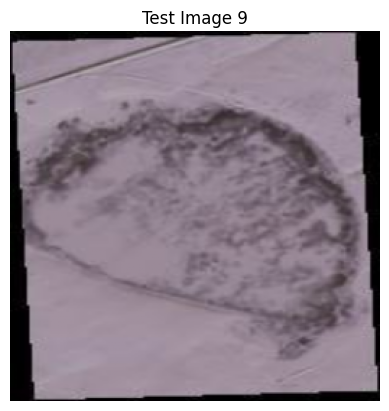

Image 10 - Water Probability: 1.0


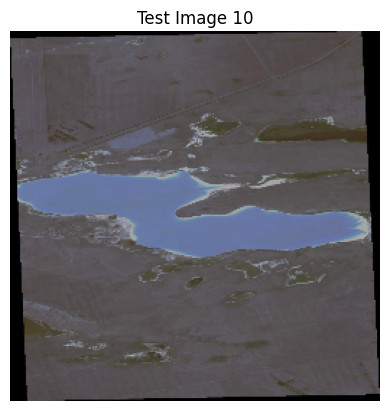

In [19]:
import matplotlib.pyplot as plt
for i in range(10):
    water_probability = np.mean(predicted_masks[i])
    print(f"Image {i+1} - Water Probability: {water_probability}")
    
    # Display the image
    plt.imshow(test_images[i])
    plt.title(f"Test Image {i+1}")
    plt.axis("off")
    plt.show()